In [3]:
import pandas as pd 
from pathlib import Path
import sys

# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

We're running localy


In [4]:
from src.data.file_manager import FileManager
weatherManager = FileManager()
color_pal = sns.color_palette()

In [5]:
raw_dir_path = weatherManager.data_dir / 'raw'

raw_path = str(raw_dir_path / 'vigne_data.csv')
df_final = pd.read_csv(raw_path)
# df_final.set_index("Years" , inplace=True)

#on rename index par Year
df_final = df_final.rename(columns={'Years': 'ds'})
df_final = df_final.rename(columns={'AverageHumidity': 'y'})
df_final

,ds,y,Domaine
0,2000-01-01,20,Marseille
1,2001-01-01,30,Marseille
2,2002-01-01,23,Marseille
3,2003-01-01,15,Marseille
4,2004-01-01,21,Marseille
5,2005-01-01,15,Marseille
6,2006-01-01,28,Marseille
7,2007-01-01,22,Marseille


In [6]:
# Convert the column to the datetime format
df_final['ds'] = pd.to_datetime(df_final['ds'])

# Split the data into train and test based on the date
train = df_final.loc[df_final['ds'] < '2003-01-01']
test = df_final.loc[df_final['ds'] >= '2003-01-01']

In [7]:
# Python
m = Prophet()
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [8]:
future = m.make_future_dataframe(periods=5, freq='Y')
future

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2002-12-31
4,2003-12-31
5,2004-12-31
6,2005-12-31
7,2006-12-31


In [9]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,19.999604,19.999604,19.999604
1,2001-01-01,29.999596,29.999596,29.999596
2,2002-01-01,22.999590,22.999590,22.999590
3,2002-12-31,-0.195414,-0.195414,-0.195414
4,2003-12-31,-6.691427,-6.691427,-6.691427
5,2004-12-31,2.299947,2.299947,2.299948
6,2005-12-31,-4.437854,-4.437855,-4.437854
7,2006-12-31,-11.063875,-11.063876,-11.063874


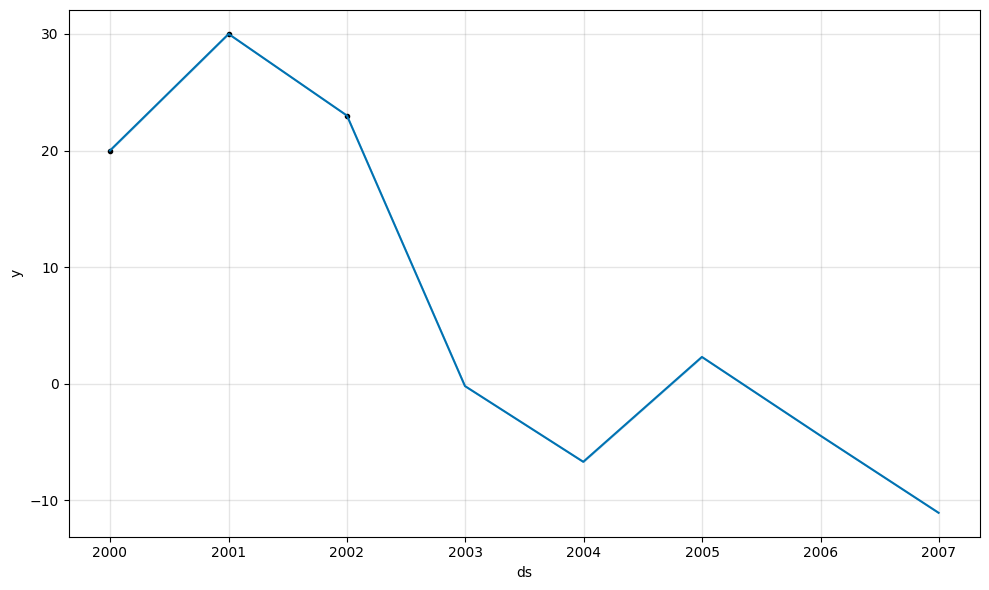

In [10]:
# Python
fig1 = m.plot(forecast)

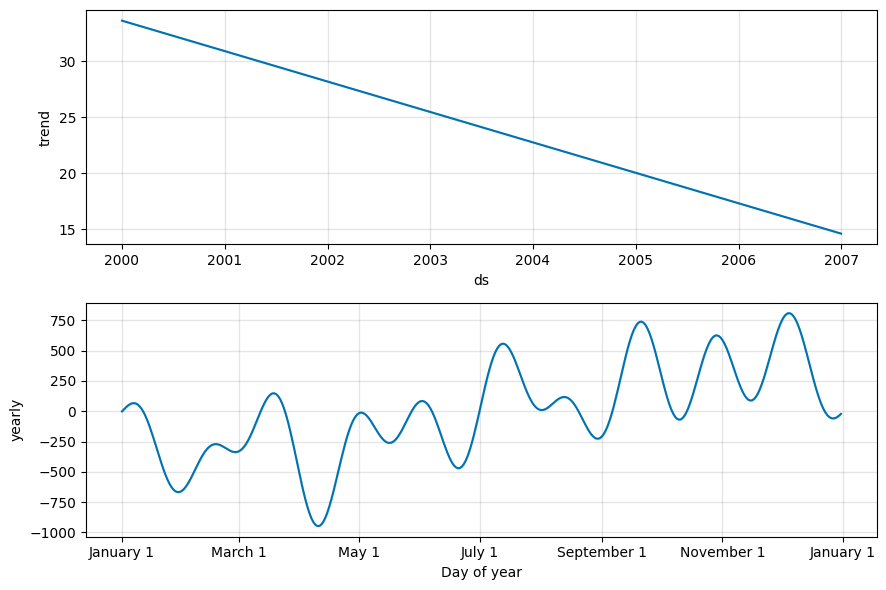

In [11]:
# Python
fig2 = m.plot_components(forecast)

In [12]:
# Python
from prophet.plot import plot_plotly

plot_plotly(m, forecast)

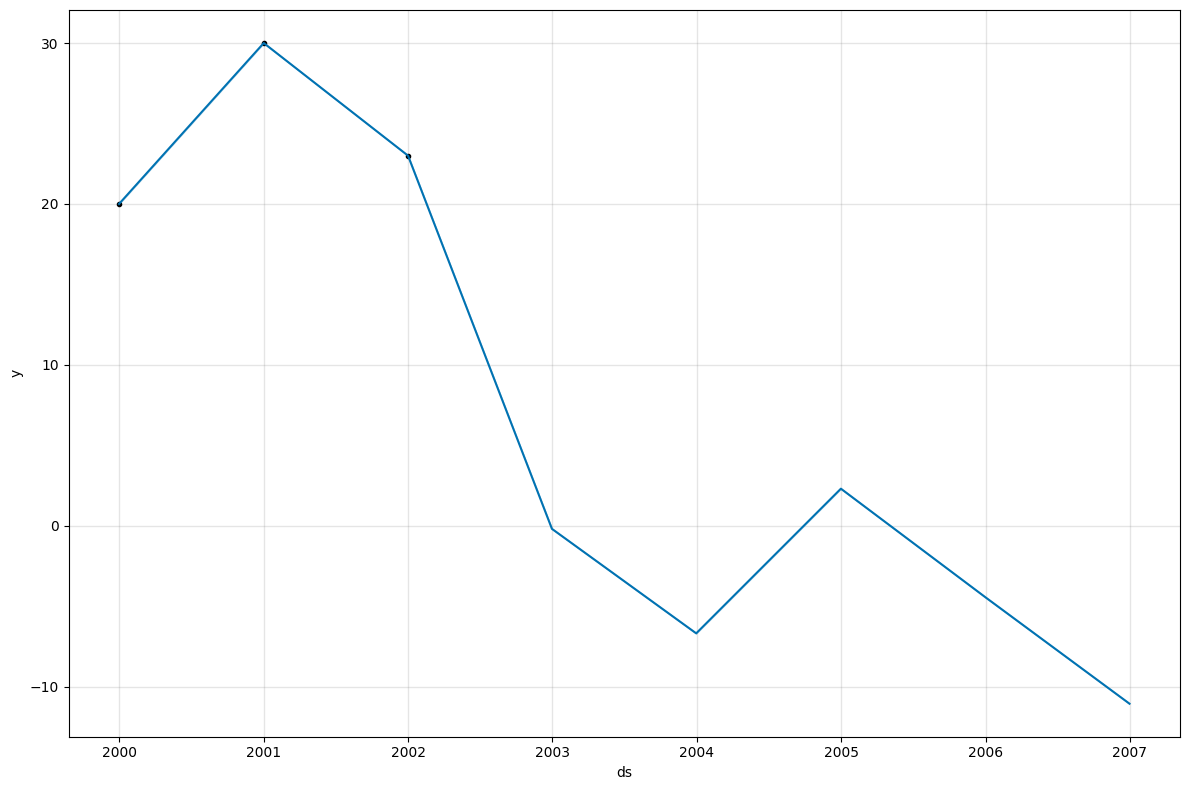

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = m.plot(forecast, ax=ax)
plt.show()

In [15]:
forecast_test = forecast.loc[forecast['ds'] >= '2003-01-01'] 
forecast_test

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4,2003-12-31,22.755778,-6.691427,-6.691427,22.755778,22.755778,-29.447205,-29.447205,-29.447205,-29.447205,-29.447205,-29.447205,0.0,0.0,0.0,-6.691427
5,2004-12-31,20.033084,2.299947,2.299948,20.033083,20.033084,-17.733136,-17.733136,-17.733136,-17.733136,-17.733136,-17.733136,0.0,0.0,0.0,2.299947
6,2005-12-31,17.317828,-4.437855,-4.437854,17.317827,17.317829,-21.755682,-21.755682,-21.755682,-21.755682,-21.755682,-21.755682,0.0,0.0,0.0,-4.437854
7,2006-12-31,14.602573,-11.063876,-11.063874,14.602571,14.602574,-25.666448,-25.666448,-25.666448,-25.666448,-25.666448,-25.666448,0.0,0.0,0.0,-11.063875


ValueError: Found input variables with inconsistent numbers of samples: [5, 4]